In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

# This is an exploration of the Palmer Station penguins dataset 
# https://allisonhorst.github.io/palmerpenguins/
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
# https://en.wikipedia.org/wiki/Pygoscelis

# Three hundred brush-tailed penguins were briefly captured
# and subjected to humiliating beak, flipper, and weight measurements 
# so that data science students don't have to look at Ronald Fisher's 
# iris dataset.

In [3]:
# There is a mirror of this dataset in vega-datasets.
# see if I'm allowed to download it by curl...
# curl https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json
!curl -OL https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67119  100 67119    0     0   489k      0 --:--:-- --:--:-- --:--:--  496k


In [4]:
# Check that the download was data and not a webpage with an error...
!head penguins.json

[
  {
    "Species": "Adelie",
    "Island": "Torgersen",
    "Beak Length (mm)": 39.1,
    "Beak Depth (mm)": 18.7,
    "Flipper Length (mm)": 181,
    "Body Mass (g)": 3750,
    "Sex": "MALE"
  },


In [5]:
penguins = pd.read_json("../data/penguins.json")

In [ ]:
# How many penguins?
penguins.Species.value_counts(), len(penguins)

In [6]:
# Dictionary for painting the dots high-contrast colors
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

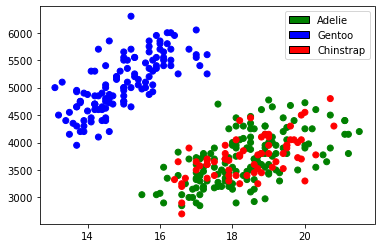

In [7]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
# Had to look up how to make a legend for this kind of data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
plt.legend(handles=legend_elements)

<AxesSubplot:xlabel='Beak Depth (mm)', ylabel='Body Mass (g)'>

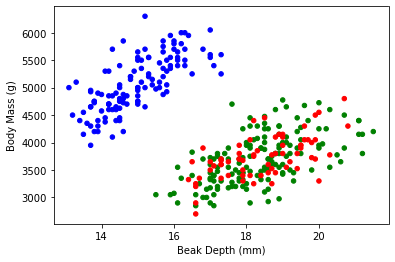

In [8]:
penguins.plot( "Beak Depth (mm)", "Body Mass (g)" , kind="scatter", color = penguins.Species.map(colors)  )

In [9]:
# Since I have to clean.. and I have to clean training and test,
# put all the essential cleaning in a funciton and call it three times.

def penguincleanit(data):
    data["SP1"] = data.Species == "Adelie"
    data["SP2"] = data.Species == "Gentoo"
    data["SP3"] = data.Species == "Chinstrap"
    # construct a class label... Adelie, Gentoo, Chinstrap. 
    # Alphabetical order would probably be a better choice.  WHY? 
    data["LABEL"] = data["SP2"] + 2 * data["SP3"]  
    # I don't know how I'm going to keep Depth / mass / flipper /length straight.
    return data[np.isfinite( data["Beak Depth (mm)"]) & 
                        np.isfinite( data["Body Mass (g)"]) &
                        np.isfinite( data["Flipper Length (mm)"]) & 
                        np.isfinite( data["Beak Length (mm)"])] 
                   
penguinclean = penguincleanit(penguins)
penguinspecies = penguinclean.Species

In [10]:
Xdf = penguinclean[["Beak Depth (mm)", "Body Mass (g)", "Flipper Length (mm)","Beak Length (mm)" ]]

In [11]:
Ydf = penguinclean[["SP1", "SP2", "SP3"]]

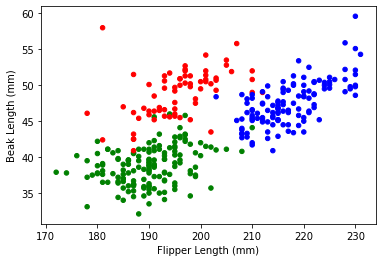

In [12]:
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", "Beak Length (mm)", kind="scatter", color = penguins.Species.map(colors))
plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Xdf.values)
X = scaler.transform(Xdf.values)

In [15]:
from numpy.linalg import svd

In [16]:
U, s, VT = svd(X)


In [32]:
s.sum(), s

(64.2104339248321, array([30.68850359, 16.25425267, 11.17634466,  6.09133301]))

In [17]:
U.shape, s.shape, VT.shape

((342, 342), (4,), (4, 4))

In [33]:
s/s.sum()

array([0.4779364 , 0.25314036, 0.17405808, 0.09486516])

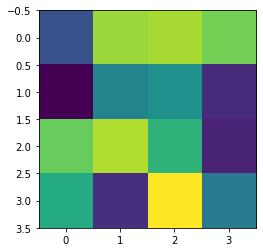

In [18]:
plt.imshow(VT)

In [19]:
VT

array([[-0.40033468,  0.54835019,  0.57601332,  0.45525033],
       [-0.79776657, -0.08436292, -0.0022822 , -0.59703114],
       [ 0.41842724,  0.59660012,  0.23208397, -0.64430115],
       [ 0.16798597, -0.57988211,  0.78379875, -0.14552311]])

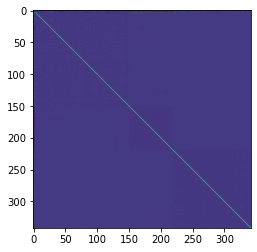

In [20]:
plt.imshow(U)

In [21]:
U[45:50, 45:50]

array([[ 9.94131891e-01, -4.82570493e-03, -5.07945553e-04,
        -4.06487615e-03, -3.71920658e-03],
       [-5.32815484e-03,  9.92899646e-01, -4.23709208e-03,
        -1.93636605e-03, -4.61816920e-03],
       [-1.07386076e-03, -4.63392539e-03,  9.93470089e-01,
        -6.94717596e-04, -2.50729724e-03],
       [-4.25064959e-03, -1.81568113e-03, -2.99629577e-04,
         9.84461076e-01,  1.07712465e-04],
       [-3.69558320e-03, -4.23924236e-03, -2.13455265e-03,
         1.74660346e-04,  9.96389268e-01]])

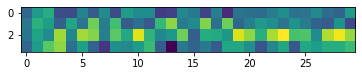

In [23]:
plt.imshow(U[0:4,0:30])

In [24]:
PC = np.dot (VT , X)

ValueError: shapes (4,4) and (342,4) not aligned: 4 (dim 1) != 342 (dim 0)

In [25]:
PC = np.dot (X, VT)

In [26]:
PC.shape

(342, 4)

In [27]:
penguinspecies.map(colors)

0      green
1      green
2      green
4      green
5      green
       ...  
338     blue
340     blue
341     blue
342     blue
343     blue
Name: Species, Length: 342, dtype: object

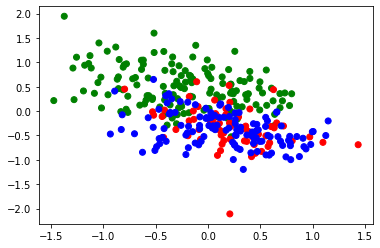

In [28]:
plt.scatter(PC[:,0], PC[:,1],  c = penguinspecies.map(colors))

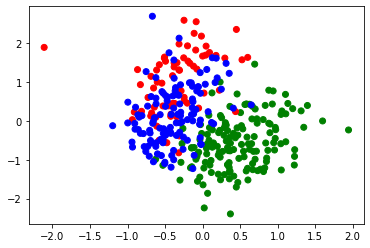

In [29]:
plt.scatter(PC[:,1], PC[:,2],  c = penguinspecies.map(colors))

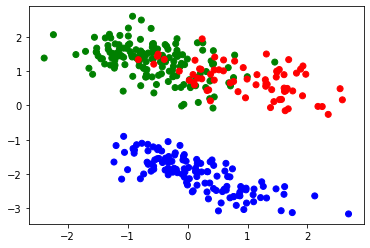

In [30]:
plt.scatter(PC[:,2], PC[:,3],  c = penguinspecies.map(colors))

In [ ]:
plt.subplot(221)
plt.scatter(PC[:,0], PC[:,1],  c = penguinspecies.map(colors))
plt.subplot(222)
plt.scatter(PC[:,1], PC[:,2],  c = penguinspecies.map(colors))
plt.subplot(223)
plt.scatter(PC[:,2], PC[:,3],  c = penguinspecies.map(colors))
plt.subplot(224)
plt.scatter(PC[:,1], PC[:,3],  c = penguinspecies.map(colors))


In [ ]:
plt.scatter(X[:,2], X[:,3], color = penguinspecies.map(colors))
plt.scatter(VT[:,2], VT[:,3], c='k')

In [ ]:
s


In [ ]:
plt.plot(s, 'o')

In [ ]:
plt.bar(range(4), s / sum(s))

In [ ]:
names = [ "PC{:02d}".format(i) for i in range(4)]

In [ ]:
names


In [ ]:
components = pd.DataFrame ({ "names": names, "fraction_explained": s / s.sum(), ""})

In [ ]:
components

In [ ]:
components = pd.DataFrame ({ "names": names, "fraction_explained": s / s.sum(), 
                            "depth": VT[:,0],
                          "weight": VT[:,1],
                          "flipper": VT[:,2],
                          "length": VT[:,3] })
components